# Programming Assignment - 6
---
## Name: Samruth Vennapusala
---

In [1]:
# Import required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib


## Question 1
---
(An open ended asignment) Visit the University of California open source [data repository](https://archive.ics.uci.edu/ml/datasets.php). Pick up an appropriate dataset of you choice preferably one with default-task 'classification'. Follow the example provided during the class to get some insight from the data that you have selected.  In the process of doing so utilize any tools and techniques at your disposal including (and not limited to)...

>- Observation of covariance and correlation between different features (columns, explanatory variables).

>- Distribution of different features and observations.

>- Utilize PCA to describe low-dimension representations.

>- Use plots such as Scree-plot, Bi-plot etc.

>- Discuss and clustering behaviours around the classes exposed by the first few PCs.

>- Anything else that you find interesting.

In [2]:
# Your code comes here
#df = pd.read_csv(r"C:/Users/samru/Desktop/aabalone.data)
#print(df)
                 
data_path = r"C:/Users/samru/Desktop/abalone.data"
test_data = pd.io.parsers.read_csv(data_path, names=['Sex', 'Length', 'Diameter', 'Heigth', 'Whole_Weight', 'Shucked_Weigth', 'Viscera_Weigth', 'Shell_Weigth', 'Rings'],engine='python', delimiter=',')

test_data.head()


,Sex,Length,Diameter,Heigth,Whole_Weight,Shucked_Weigth,Viscera_Weigth,Shell_Weigth,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


<function matplotlib.pyplot.show(*args, **kw)>

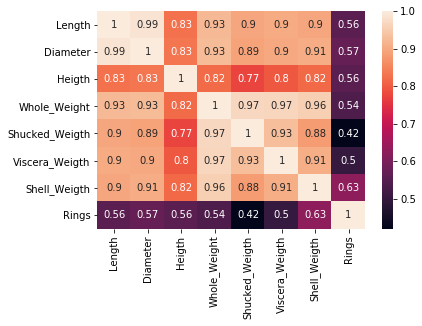

In [3]:
#covariance and correlation between different features
#Correlation
correlation = test_data.corr()
sns.heatmap(correlation, annot = True)
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

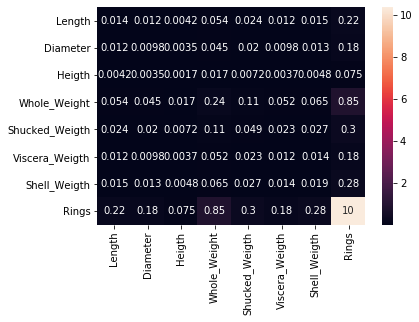

In [4]:
#Covariance
covariance = test_data.cov()
sns.heatmap(covariance, annot = True)
plt.show

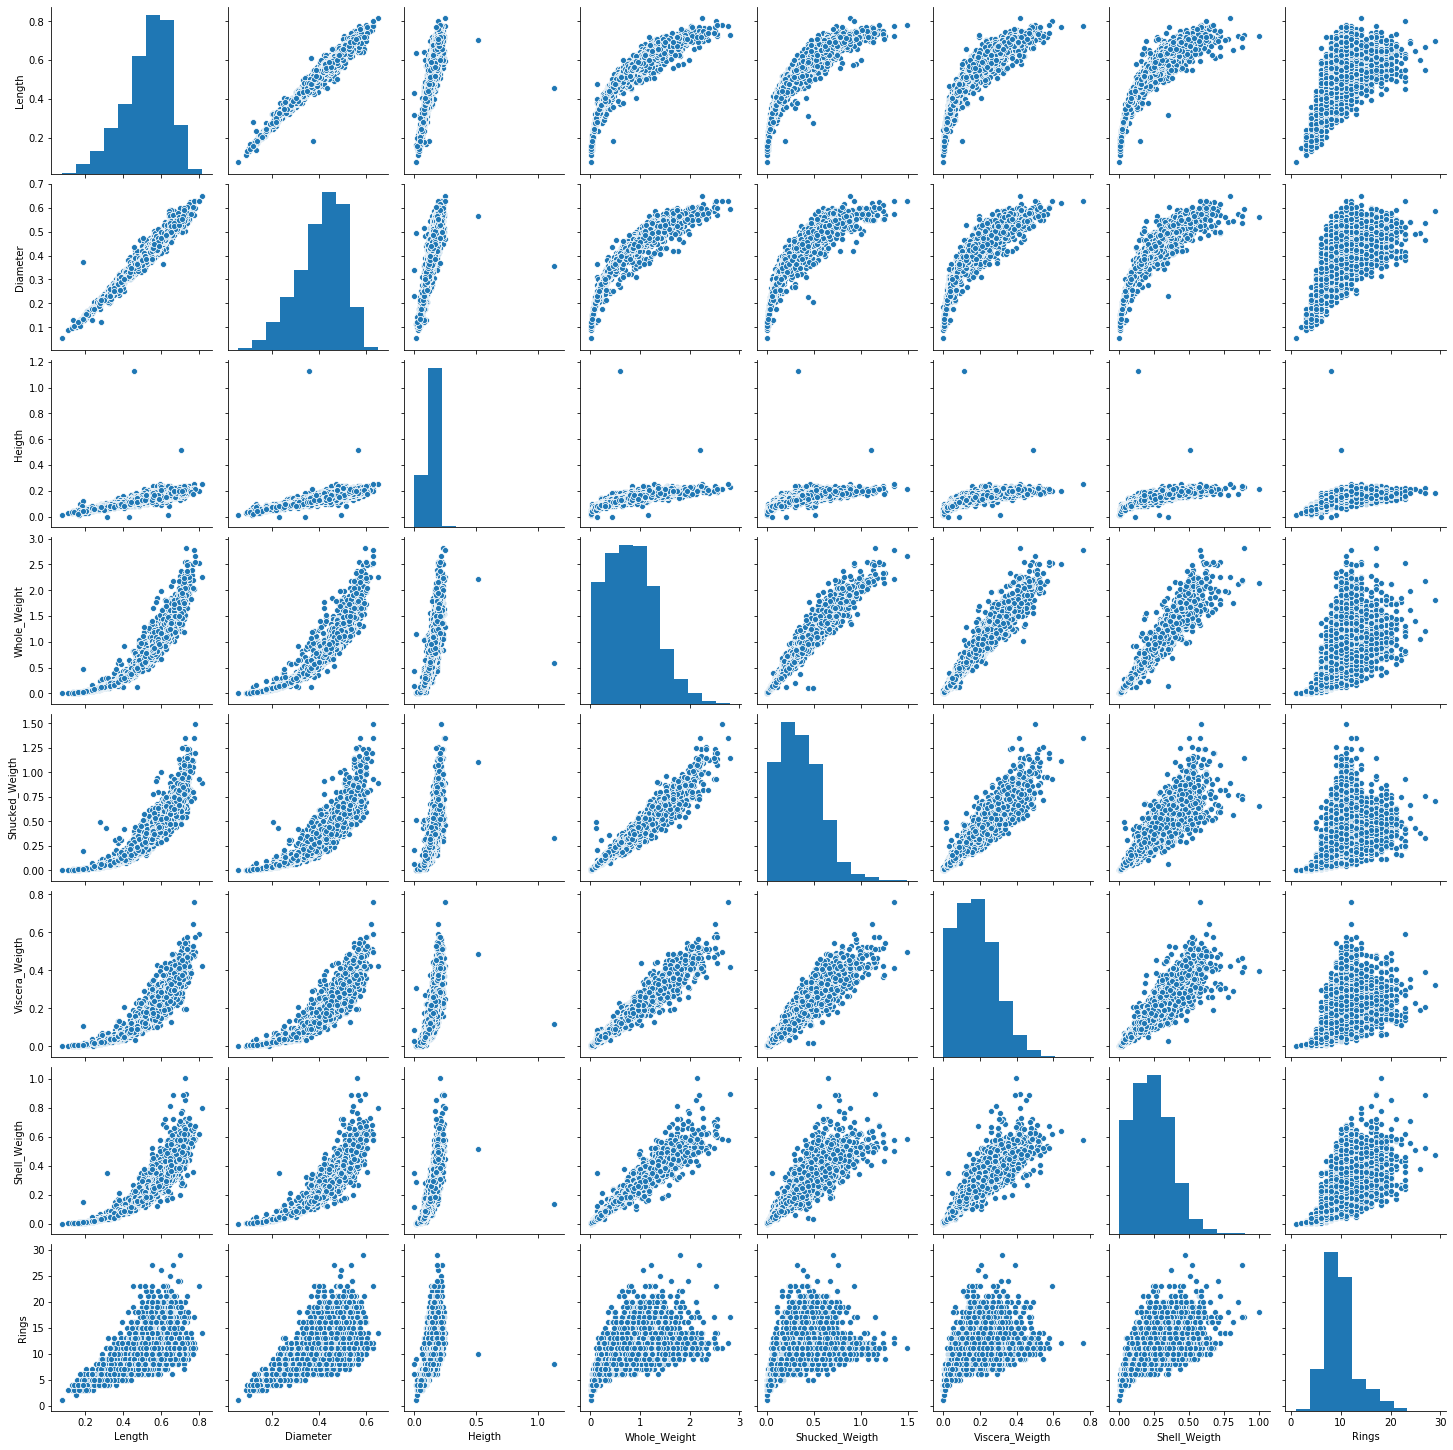

In [5]:
#Distributions of features 
sns.pairplot(test_data)

In [6]:
features = ['Length', 'Diameter', 'Heigth', 'Whole_Weight', 'Shucked_Weigth', 'Viscera_Weigth', 'Shell_Weigth', 'Rings']
x = test_data.loc[:, features].values
y = test_data.loc[:,['Sex']].values
x = StandardScaler().fit_transform(x)

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [8]:
finalDf = pd.concat([principalDf, test_data[['Sex']]], axis = 1)

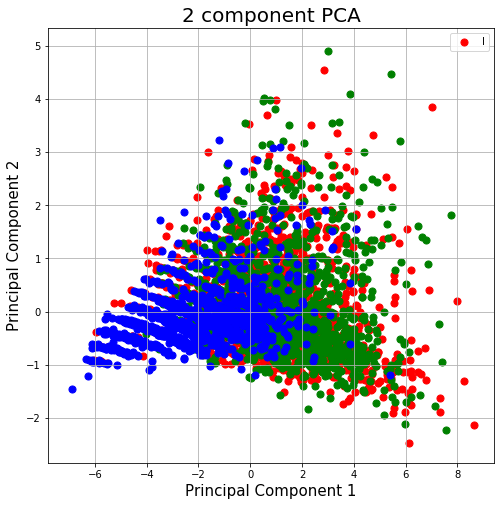

In [9]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
sex = ['M', 'F', 'I']
colors = ['r', 'g', 'b']
for sex, color in zip(sex,colors):
    indicesToKeep = finalDf['Sex'] == sex
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(sex)
ax.grid()

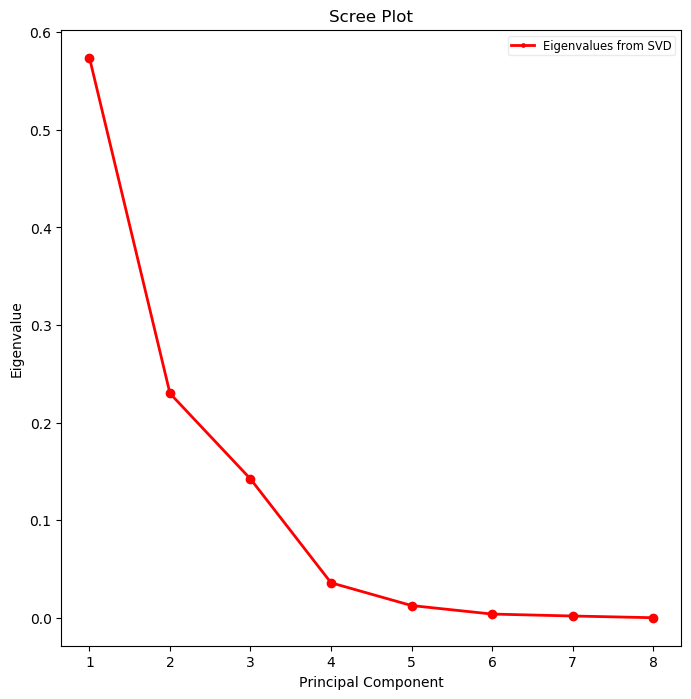

In [28]:
#Scree Plot

num_vars = 8
num_obs = 9
A = np.random.randn(num_obs, num_vars)
A = np.asmatrix(A.T) * np.asmatrix(A)
U, S, V = np.linalg.svd(A) 
eigvals = S**2 / np.sum(S**2)  # NOTE (@amoeba): These are not PCA eigenvalues. 
                               # This question is about SVD.

fig = plt.figure(figsize=(8,8))
sing_vals = np.arange(num_vars) + 1
plt.plot(sing_vals, eigvals, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
#I don't like the default legend so I typically make mine like below, e.g.
#with smaller fonts and a bit transparent so I do not cover up data, and make
#it moveable by the viewer in case upper-right is a bad place for it 
leg = plt.legend(['Eigenvalues from SVD'], loc='best', borderpad=0.3, 
                 shadow=False, prop=matplotlib.font_manager.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
plt.show()

In [25]:
#biplot
from pca import pca

ModuleNotFoundError: No module named 'colourmap'

In [23]:
model = pca(n_components=.8)
results = model.fit_transform(test_data)
fig, ax = model.plot()
fig, ax = model.scatter()
fix,ax = model.biplot(n_feat=1)

TypeError: 'PCA' object is not callable

In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(x)
kmeans.labels_


array([0, 1, 0, ..., 2, 2, 2])

In [36]:
print(y)

[['M']
 ['M']
 ['F']
 ...
 ['M']
 ['F']
 ['M']]


## We get that we were able to predict the sex with the k means clustering with a good error rate. The features of the data are really good predicters of the actual sex.